<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1164]:
import pandas as pd

In [1165]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [1166]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [1167]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [1168]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [1169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [1170]:
df = pd.read_csv('lending_club_loan_two.csv')

In [1171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [1172]:
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'dti', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
categorical_features = ['term', 'home_ownership', 'application_type', 'address', 'grade', 'sub_grade', 'verification_status', 'issue_d', 'loan_status', 'initial_list_status', 'purpose', 'title', 'earliest_cr_line', 'emp_title', 'emp_length']

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<Axes: xlabel='loan_status', ylabel='count'>

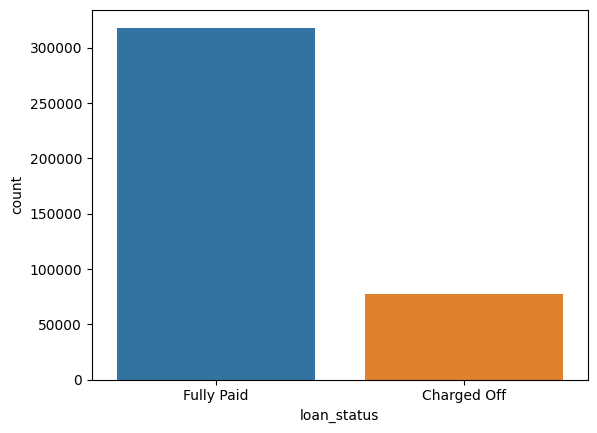

In [1173]:
sns.countplot(data=df, x='loan_status')

**TASK: Create a histogram of the loan_amnt column.**

<Axes: xlabel='loan_amnt', ylabel='Count'>

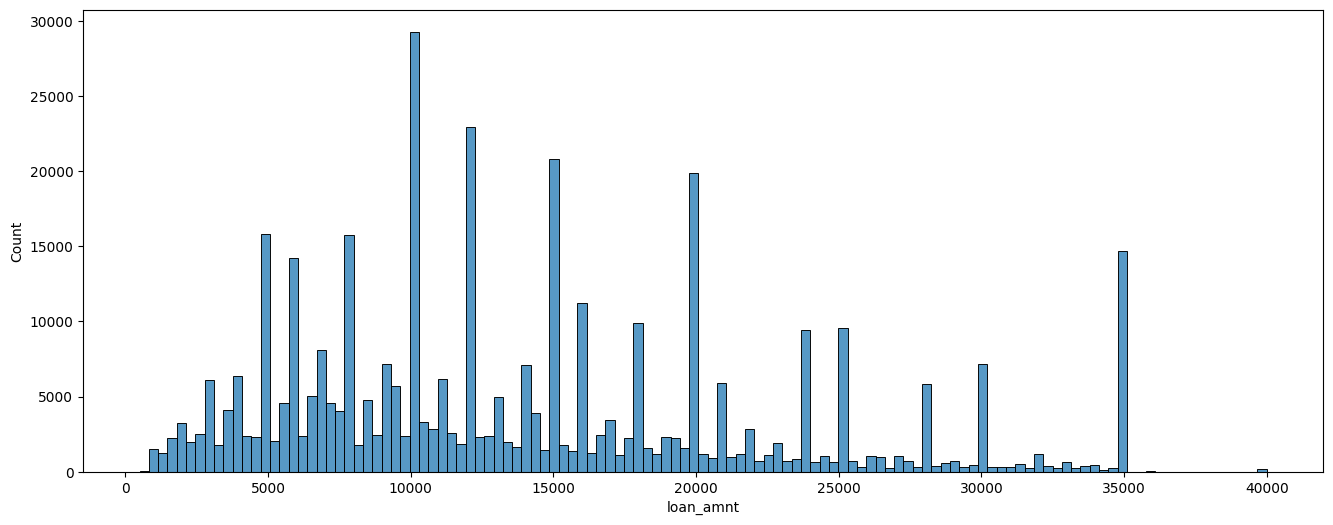

In [1174]:

plt.figure(figsize=(16,6))
sns.histplot(data=df, x='loan_amnt')

# solution
# sns.distplot(df['loan_amnt], kde=False, bins=40)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [1175]:
df.head(50)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [1176]:
ndf = df[numerical_features]
ndf.corr()

,loan_amnt,int_rate,installment,annual_inc,open_acc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.198556,0.016636,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.011649,0.079038,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.188973,0.015786,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,0.136150,-0.081685,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
open_acc,0.198556,0.011649,0.188973,0.136150,1.000000,0.136181,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
dti,0.016636,0.079038,0.015786,-0.081685,0.136181,1.000000,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.018392,-0.017639,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.221192,0.063571,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,-0.131420,0.088375,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.680728,0.102128,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

<Axes: >

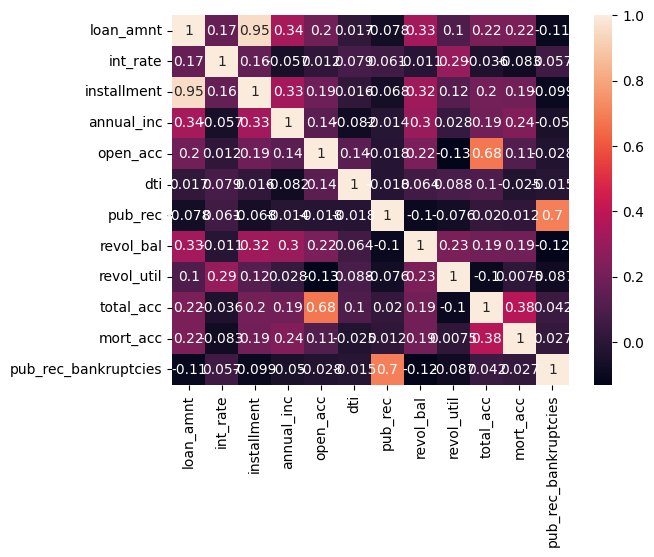

In [1177]:
sns.heatmap(data=ndf.corr(), annot=True)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [1178]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [1179]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

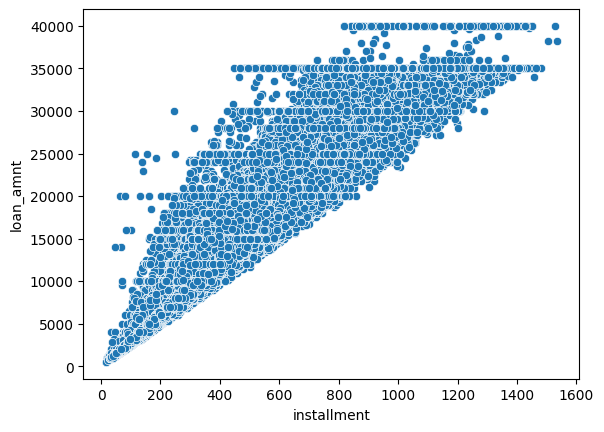

In [1180]:
sns.scatterplot(data=df, x='installment', y='loan_amnt')

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

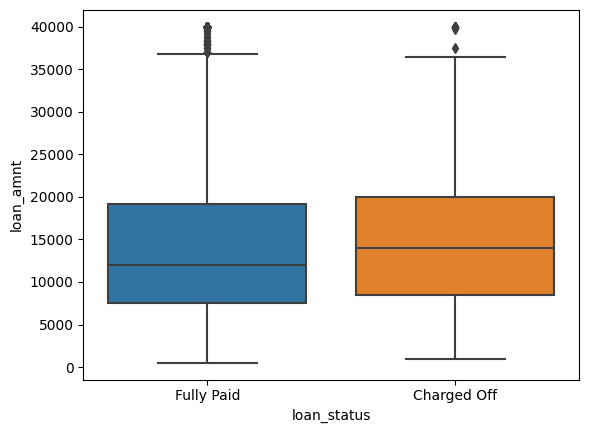

In [1181]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [1182]:
#df[['loan_amnt','loan_status']].groupby('loan_status').describe()

# solution
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [1183]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [1184]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<Axes: xlabel='grade', ylabel='count'>

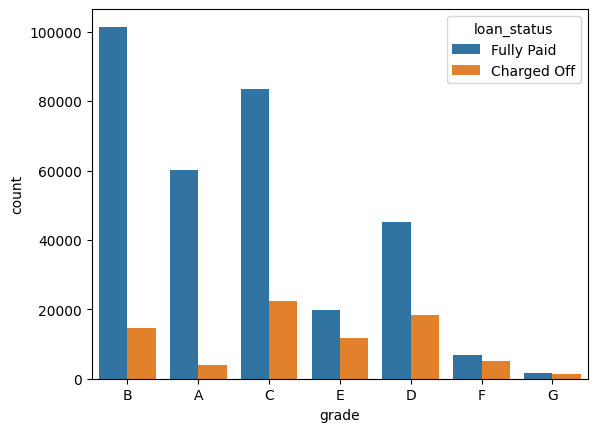

In [1185]:
sns.countplot(data=df, x='grade', hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [1186]:

sub_grades = np.sort(df['sub_grade'].unique(), axis=None)
sub_grades


array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<Axes: xlabel='sub_grade', ylabel='count'>

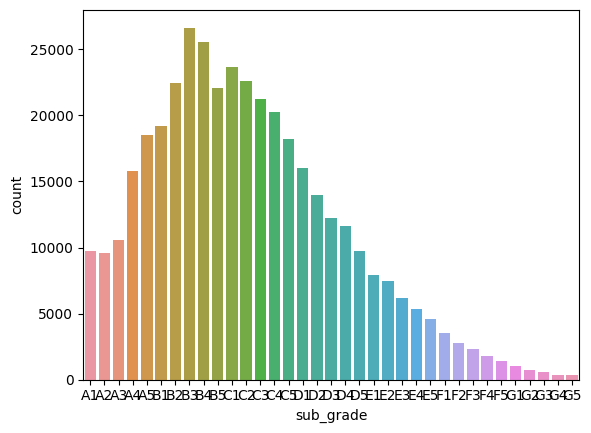

In [1187]:
sns.countplot(data=df, x='sub_grade', order=sub_grades)

# solution
# sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()))

<Axes: xlabel='sub_grade', ylabel='count'>

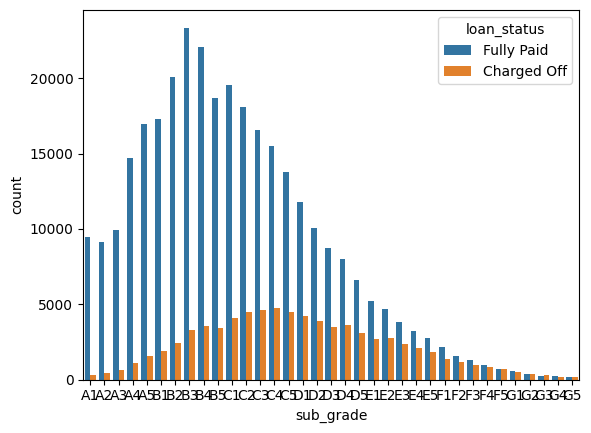

In [1188]:
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=sub_grades)

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

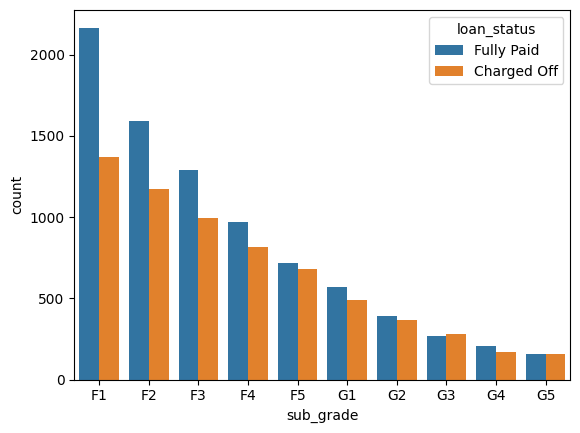

In [1189]:
df_DF = df[df['sub_grade'].apply(lambda x: 'F' in x or 'G' in x)]
sns.countplot(data=df_DF, x='sub_grade', hue='loan_status', order=np.sort(df_DF['sub_grade'].unique(), axis=None))

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [1190]:
# df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if 'Fully Paid' in x else 0)

In [1191]:
# solution
df['loan_repaid'] = df['loan_status'].map({ 'Fully Paid': 1, 'Charged Off': 0 })

In [ ]:
df['loan_repaid'].head()

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [1192]:
df.iloc[0]

loan_amnt                                                    10000.0
term                                                       36 months
int_rate                                                       11.44
installment                                                   329.48
grade                                                              B
sub_grade                                                         B4
emp_title                                                  Marketing
emp_length                                                 10+ years
home_ownership                                                  RENT
annual_inc                                                  117000.0
verification_status                                     Not Verified
issue_d                                                     Jan-2015
loan_status                                               Fully Paid
purpose                                                     vacation
title                             

<Axes: >

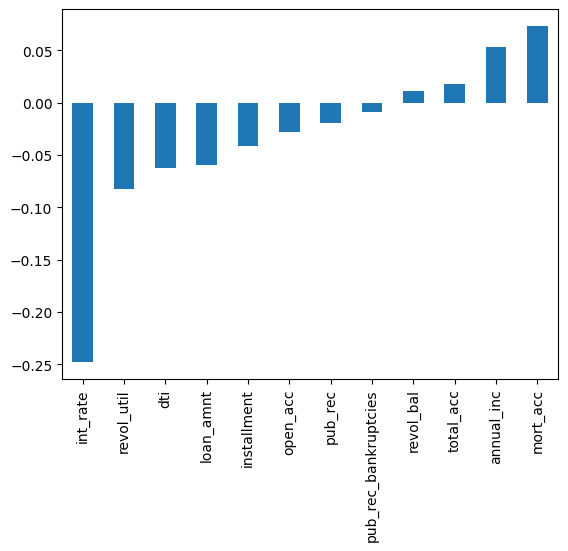

In [1193]:
df.drop(categorical_features, axis=1).corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [1194]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [1195]:
na_df = df.isnull().sum()
na_df

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [1196]:
na_df['title']

1756

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [1197]:
na_df = 100* df.isnull().sum()/len(df)

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [1198]:
print(feat_info('emp_title'))
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**TASK: How many unique employment job titles are there?**

In [1199]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [1200]:
df.drop('emp_title', axis=1, inplace=True)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

<Axes: xlabel='emp_length', ylabel='count'>

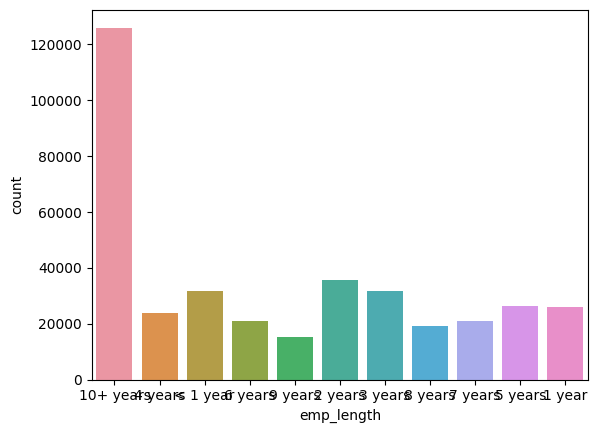

In [1201]:
sns.countplot(data=df, x='emp_length')

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

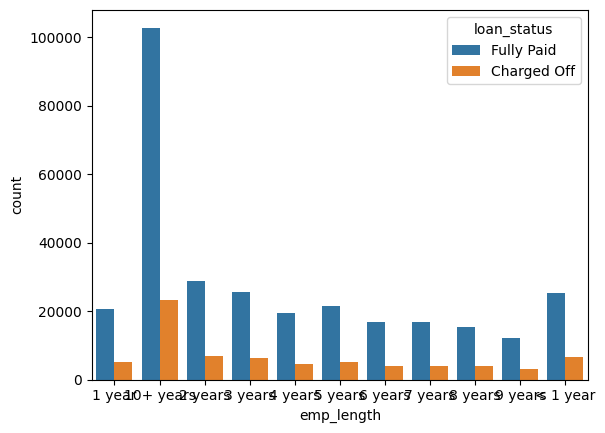

In [1202]:
sns.countplot(data=df, x='emp_length', hue='loan_status', order=sorted(df['emp_length'].dropna().unique()))

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [1203]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [1204]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [1205]:
emp_len = emp_co/emp_fp

In [1206]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [1207]:
df.drop('emp_length', axis=1, inplace=True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [1208]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [1209]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [1210]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [1211]:
df.drop('title', axis=1, inplace=True)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [1212]:
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [1213]:
mort_acc = df['mort_acc'].value_counts()
mort_acc

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [1214]:
print("Correlation with the mort_acc column")
df[numerical_features].corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [1215]:
print("Mean of mort_acc column per total_acc")
df[numerical_features].groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [1216]:
total_acc_avg = df[numerical_features].groupby('total_acc').mean()['mort_acc']

In [1217]:
total_acc_avg[2.0]

0.0

In [1218]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [1219]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [1220]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [1221]:
df = df.dropna(inplace=False, axis=1)

In [1222]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [1223]:
list(df.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [1224]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [1225]:
import re

df['term'] = df['term'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [1226]:
df['term'].head(10)

0    36
1    36
2    36
3    36
4    60
5    36
6    36
7    36
8    60
9    36
Name: term, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [1227]:
df.drop('grade', axis=1, inplace=True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [1228]:
dummies = pd.get_dummies(df['sub_grade'])

In [1229]:
df = pd.concat([df, dummies], axis=1)
df.drop('sub_grade', axis=1)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,False,False,False,False,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False


### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [1230]:
features = ['verification_status', 'application_type','initial_list_status','purpose']

for feature in features:
    dummies = pd.get_dummies(df[feature])
    df = pd.concat([df, dummies])
    df.drop(feature, axis=1, inplace=True)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [1231]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [1232]:
df['home_ownership'].apply(lambda x: x if x != 'NONE' or x != 'ANY' else 'OTHER')
dummies = pd.get_dummies(df['home_ownership'])
df = pd.concat([df, dummies], axis=1)
df.drop('home_ownership', axis=1, inplace=True)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [1233]:
df['address']

0            0174 Michelle Gateway\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                   823 Reid Ford\nDelacruzside, MA 00813
4                    679 Luna Roads\nGreggshire, VA 11650
                               ...                       
396025                                                NaN
396026                                                NaN
396027                                                NaN
396028                                                NaN
396029                                                NaN
Name: address, Length: 6336480, dtype: object

In [1234]:
df['zip_code'] = df['address'].apply(lambda x: (x.split()[-1]) if pd.notna(x) else x)

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [1235]:
dummies = pd.get_dummies(df['zip_code'])
df = pd.concat([df, dummies], axis=1)

In [1236]:
df.drop('zip_code', axis=1, inplace=True)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [1237]:
df.drop('issue_d', axis=1, inplace=True)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [1238]:
df['earliest_cr_line'].head(15)

0     Jun-1990
1     Jul-2004
2     Aug-2007
3     Sep-2006
4     Mar-1999
5     Jan-2005
6     Aug-2005
7     Sep-1994
8     Jun-1994
9     Dec-1997
10    Dec-1990
11    May-1984
12    Apr-1995
13    Jan-1997
14    May-2001
Name: earliest_cr_line, dtype: object

In [1239]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: (int(re.findall(r'\d+', x)[0])) if pd.notna(x) else x)
df.drop('earliest_cr_line', axis=1, inplace=True)

In [1240]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,loan_status,dti,open_acc,pub_rec,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36.0,11.44,329.48,B4,117000.0,Fully Paid,26.24,16.0,0.0,...,False,False,True,False,False,False,False,False,False,1990.0
1,8000.0,36.0,11.99,265.68,B5,65000.0,Fully Paid,22.05,17.0,0.0,...,True,False,False,False,False,False,False,False,False,2004.0
2,15600.0,36.0,10.49,506.97,B3,43057.0,Fully Paid,12.79,13.0,0.0,...,True,False,False,False,False,False,False,False,False,2007.0
3,7200.0,36.0,6.49,220.65,A2,54000.0,Fully Paid,2.60,6.0,0.0,...,False,False,False,False,False,False,False,False,False,2006.0
4,24375.0,60.0,17.27,609.33,C5,55000.0,Charged Off,33.95,13.0,0.0,...,False,True,False,False,False,False,False,False,False,1999.0


In [1241]:
df.isnull().sum()

loan_amnt           5940450
term                5940450
int_rate            5940450
installment         5940450
sub_grade           5940450
                     ...   
48052                     0
70466                     0
86630                     0
93700                     0
earliest_cr_year    5940450
Length: 89, dtype: int64

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [1242]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [1243]:
df.drop('loan_status', axis=1, inplace=True)

**TASK: Set X and y variables to the .values of the features and label.**

In [1244]:
X = df.drop('loan_repaid', axis=1, inplace=False).values
y = df['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [1245]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

633648


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [1246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [1247]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
153264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN
314125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN
277970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN
125960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN
8388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN


In [1248]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [1249]:
scaler.fit_transform(X_train)

ValueError: could not convert string to float: 'D1'

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

ModuleNotFoundError: No module named 'tensorflow'

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [ ]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [ ]:
# CODE HERE

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2959 - val_loss: 0.2652
Epoch 2/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2652 - val_loss: 0.2643
Epoch 3/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2628 - val_loss: 0.2626
Epoch 4/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2613 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2609 - val_loss: 0.2621
Epoch 6/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2603 - val_loss: 0.2618
Epoch 7/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2595 - val_loss: 0.2616
Epoch 9/25
316175/316175 [==============================] - 3s 10us/sample - 

**TASK: OPTIONAL: Save your model.**

In [ ]:
# CODE HERE

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [ ]:
# CODE HERE

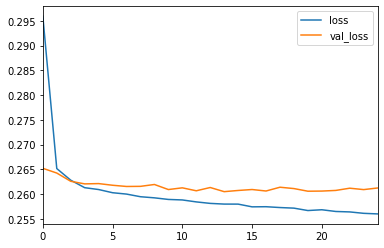

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [ ]:
# CODE HERE

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



array([[ 6850,  8808],
       [  100, 63286]], dtype=int64)

**TASK: Given the customer below, would you offer this person a loan?**

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                    6.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
# CODE HERE

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [ ]:
# CODE HERE

1.0

# GREAT JOB!